c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


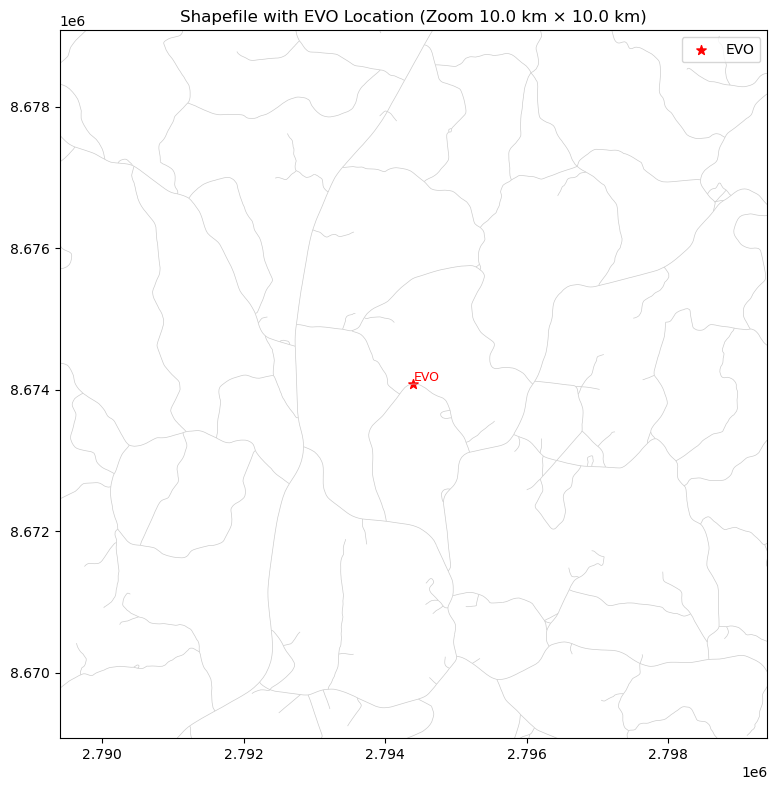

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

def visualize_shapefile_with_point(
    shp_path: str,
    evo_coords: tuple[float, float],  # (lon, lat) if CRS is EPSG:4326
    attribute: str | None = None,
    cmap: str = "viridis",
    with_basemap: bool = True,
    figsize=(10, 8),
    zoom_km: float = 10.0   # size of window in km
):
    # Load shapefile
    gdf = gpd.read_file(shp_path)

    # Make sure CRS is set
    if gdf.crs is None:
        gdf = gdf.set_crs("EPSG:4326")

    # Create GeoDataFrame for EVO point
    evo_gdf = gpd.GeoDataFrame(
        {"name": ["EVO"]},
        geometry=[Point(evo_coords)],
        crs="EPSG:4326"
    )

    # Reproject both layers if needed (for basemap)
    if with_basemap:
        gdf = gdf.to_crs(epsg=3857)
        evo_gdf = evo_gdf.to_crs(epsg=3857)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)

    # Base map of shapefile
    if attribute and attribute in gdf.columns:
        gdf.plot(column=attribute, cmap=cmap, legend=True, edgecolor="black", linewidth=0.5, ax=ax)
    else:
        gdf.plot(color="#cccccc", edgecolor="black", linewidth=0.5, ax=ax)

    # EVO point
    evo_gdf.plot(ax=ax, color="red", marker="*", markersize=50, label="EVO")

    # Labels
    for x, y, label in zip(evo_gdf.geometry.x, evo_gdf.geometry.y, evo_gdf["name"]):
        ax.text(x, y, label, fontsize=9, ha="left", va="bottom", color="red")

    # --- ZOOM around EVO ---
    evo_x, evo_y = evo_gdf.geometry.x.iloc[0], evo_gdf.geometry.y.iloc[0]
    half_size = (zoom_km * 1000) / 2  # convert km → meters
    ax.set_xlim(evo_x - half_size, evo_x + half_size)
    ax.set_ylim(evo_y - half_size, evo_y + half_size)

    ax.legend()
    ax.set_title(f"Shapefile with EVO Location (Zoom {zoom_km} km × {zoom_km} km)")
    plt.tight_layout()
    plt.show()


# Example:
# evo_coords = (25.108281818129058, 61.19312126520957)  
evo_coords = (25.102531, 61.209454)


visualize_shapefile_with_point(r"C:\Users\telukkari\Downloads\KANTA-HAME\KANTA-HAME\DR_LINKKI_K.shp", evo_coords)



c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


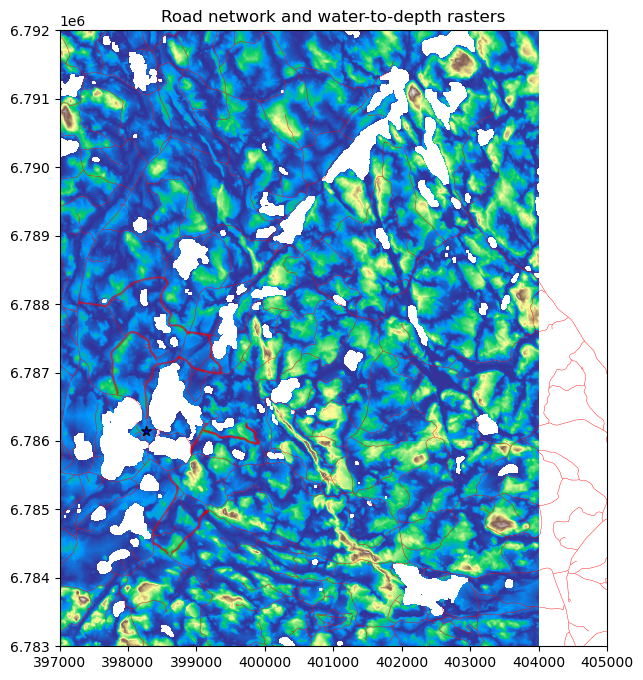

In [18]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import laspy

# Paths
tif_path1 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4134F.tif"
tif_path2 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4134H.tif"
tif_path3 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4143E.tif"
tif_path4 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4143G.tif"
shp_path = r"C:\Users\telukkari\Downloads\KANTA-HAME\KANTA-HAME\DR_LINKKI_K.shp" 

las_files = [
    (r"D:\MLS-data\test\trajectory_pieni_lenkki_ALS_frame.las"),
    (r"D:\MLS-data\test\trajectory_plot3_gravel_ALS_frame.las"),
    (r"D:\MLS-data\test\trajectory_plot3_small_rocks_ALS_frame.las"),
    (r"D:\MLS-data\test\trajectory_test2_road_flat_ALS_frame.las"),
    (r"D:\MLS-data\test\trajectory_test2_road_vegetation_ALS_frame.las"),
    (r"D:\MLS-data\test\trajectory_iso_lenkki_ALS_frame.las"),
]



# Load shapefile
gdf = gpd.read_file(shp_path)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Show rasters
for tif in [tif_path1, tif_path2, tif_path3, tif_path4]:
    with rasterio.open(tif) as src:
        show(src, ax=ax, cmap="terrain")


for las_path in las_files:
    las = laspy.read(las_path)
    x = las.x[::5]   # every 5th point
    y = las.y[::5]
    z = las.z[::5]

    ax.scatter(x, y, c="red", s=0.1, alpha=0.2)


# Overlay shapefile
gdf.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=0.3)

x, y = 3.98260924e+05 , 6.78613845e+06
ax.scatter(x, y, c="blue", s=50, marker="*", edgecolor="black", zorder=5, label="My point")


# Optional zoom
ax.set_xlim(397000, 405000)
ax.set_ylim(6783000, 6792000)

ax.set_title("Road network and water-to-depth rasters")
plt.show()

[    0     1     2 ...  3014  3026 32767]
1
3000 3000
LOCAL_CS["ETRS89 / TM35FIN(E,N)",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=392000.0, bottom=6780000.0, right=398000.0, top=6786000.0)
(None,)


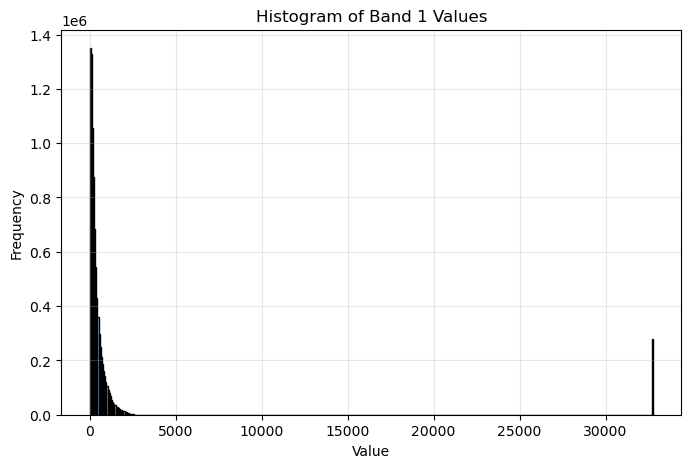

In [23]:
import numpy as np

with rasterio.open(tif_path1) as src:
    band1 = src.read(1)
    print(np.unique(band1))
    print(src.count)          # number of bands
    print(src.width, src.height)  # raster size
    print(src.crs)            # coordinate reference system
    print(src.bounds)         # bounding box (xmin, ymin, xmax, ymax)
    print(src.descriptions)   # band names (if present)


vals = band1.flatten()

plt.figure(figsize=(8, 5))
plt.hist(vals, bins=500, color="skyblue", edgecolor="black")
plt.title("Histogram of Band 1 Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


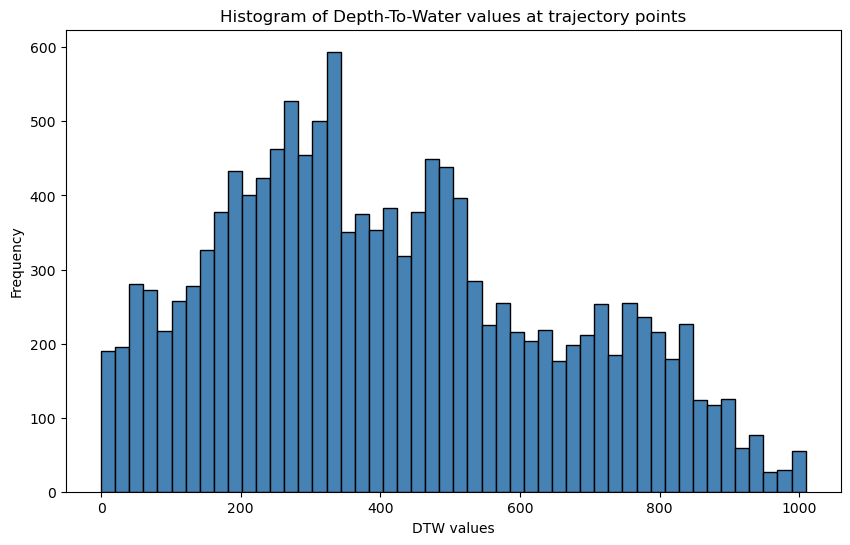

In [36]:
import laspy
import rasterio
import matplotlib.pyplot as plt

las_files = [
    r"D:\MLS-data\test\trajectory_pieni_lenkki_ALS_frame.las",
    r"D:\MLS-data\test\trajectory_plot3_gravel_ALS_frame.las",
    r"D:\MLS-data\test\trajectory_plot3_small_rocks_ALS_frame.las",
    r"D:\MLS-data\test\trajectory_test2_road_flat_ALS_frame.las",
    r"D:\MLS-data\test\trajectory_test2_road_vegetation_ALS_frame.las",
    r"D:\MLS-data\test\trajectory_iso_lenkki_ALS_frame.las",
]

tif_path1 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4134F.tif"
tif_path2 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4134H.tif"
tif_path3 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4143E.tif"
tif_path4 = r"C:\Users\telukkari\Downloads\paituli_68626932\luke\dtw\2023\DTW_INT_CMv2_4\M4143G.tif"

all_values = []

for tif_path in [tif_path1, tif_path2, tif_path3, tif_path4]:
    with rasterio.open(tif_path) as src:
        band1 = src.read(1) 

        for las_path in las_files:
            las = laspy.read(las_path)
            xs = las.x
            ys = las.y

            coords = list(zip(xs, ys))

            for val in src.sample(coords):
                v = val[0]
                if v != src.nodata:  # skip nodata
                    all_values.append(v)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(all_values, bins=50, color="steelblue", edgecolor="black")
plt.xlabel("DTW values")
plt.ylabel("Frequency")
plt.title("Histogram of Depth-To-Water values at trajectory points")
plt.show()



In [ ]:
# TODO: bearing capacity correlation with DTW for Lieksa / Parikkala
# TODO: check weather (rain) data before bearing capacity measurements